In [94]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [95]:
import sys
import copy

import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.io import savemat
import scipy.signal

import torch
import torchvision
import torchvision.transforms as transforms

import os

# for reading and displaying images
from skimage.io import imread
# for creating validation set
from sklearn.model_selection import train_test_split
# for evaluating the model
from sklearn.metrics import accuracy_score

import pathlib
from imgaug import augmenters as iaa


%matplotlib notebook
%matplotlib notebook
%matplotlib inline
# %matplotlib qt

In [96]:
# torch.cuda.current_device()

In [97]:
# torch.cuda.get_device_name(0)

In [98]:
dup_num = 1

Load and preprocess stat file and labels  
Labels must be made in the 'ROI_labeling_and_augmentation' script and the relabeling script  
## outputs: 'images' and 'labels' (both input into CNN)


In [99]:
def load_npy(base_dir='label_data', subpath='mouse 6_28 _ day 20200903', lbl=''):
    
    # dir_load = '\\\\research.files.med.harvard.edu\\Neurobio\\MICROSCOPE\\Rich\\data\\res2p\\scanimage data\\round 4 experiments\\mouse 6.28\\20200815\\suite2p\\plane0\\'
    fileName_load = 'stat.npy'

#     PATH_absolute = pathlib.Path('.').absolute()
    
    PATH_load_dir_statFile = f'{base_dir}/{subpath}/'
#     PATH_load_dir_statFile = f'{PATH_absolute}/{base_dir}/{subpath}/'
    # PATH_load_dir_statFile = '/media/rich/Home_Linux_partition/GoogleDrive_ocaml_cache/Research/Sabatini Lab Stuff - working/Code/PYTHON/ROI_Classifiers/test data_mouse6_28 _ 20200815/'
    print(f'PATH:   {PATH_load_dir_statFile}{fileName_load}')
    print('')

    stat = np.load(f'{PATH_load_dir_statFile}{fileName_load}', allow_pickle=True)
    print('stat file loaded')
    print('')

    num_ROI = stat.shape[0]
    print(f'Number of ROIs: {num_ROI}')

    height = 512
    width = 1024
    spatial_footprints_centered = np.zeros((num_ROI, 241,241))
    for i in range(num_ROI):
        spatial_footprints_centered[i , stat[i]['ypix'] - np.int16(stat[i]['med'][0]) + 120, stat[i]['xpix'] - np.int16(stat[i]['med'][1]) + 120] = stat[i]['lam'] # this is formatted for coding ease (dim1: y pix) (dim2: x pix) (dim3: ROI#)
    spatial_footprints_centered_crop = spatial_footprints_centered[:, 102:138 , 102:138]

    # %matplotlib inline
    plt.figure()
    plt.imshow(np.max(spatial_footprints_centered_crop , axis=0) ** 0.2);
    plt.title(f'spatial_footprints_centered_crop{lbl} MIP^0.2');

    images = spatial_footprints_centered_crop
    return spatial_footprints_centered_crop

PATH:   /media/rich/bigSSD/downloads_tmp/labels_ROI_Classifier/mouse 6_28 _ day 20200903/stat.npy

stat file loaded

Number of ROIs: 4868


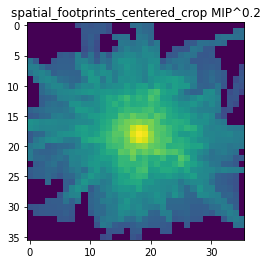

In [100]:
# LOAD stat.npy file 1
#___________________


# # dir_load = '\\\\research.files.med.harvard.edu\\Neurobio\\MICROSCOPE\\Rich\\data\\res2p\\scanimage data\\round 4 experiments\\mouse 6.28\\20200815\\suite2p\\plane0\\'
# fileName_load = 'stat.npy'

# PATH_absolute = pathlib.Path('.').absolute()
# PATH_load_dir_statFile = f'{PATH_absolute}/label data/mouse 6_28 _ day 20200903/'
# # PATH_load_dir_statFile = '/media/rich/Home_Linux_partition/GoogleDrive_ocaml_cache/Research/Sabatini Lab Stuff - working/Code/PYTHON/ROI_Classifiers/test data_mouse6_28 _ 20200815/'
# print(f'PATH:   {PATH_load_dir_statFile}{fileName_load}')
# print('')

# stat = np.load(f'{PATH_load_dir_statFile}{fileName_load}', allow_pickle=True)
# print('stat file loaded')
# print('')

# num_ROI = stat.shape[0]
# print(f'Number of ROIs: {num_ROI}')

# height = 512
# width = 1024
# spatial_footprints_centered = np.zeros((num_ROI, 241,241))
# for i in range(num_ROI):
#     spatial_footprints_centered[i , stat[i]['ypix'] - np.int16(stat[i]['med'][0]) + 120, stat[i]['xpix'] - np.int16(stat[i]['med'][1]) + 120] = stat[i]['lam'] # this is formatted for coding ease (dim1: y pix) (dim2: x pix) (dim3: ROI#)
# spatial_footprints_centered_crop = spatial_footprints_centered[:, 102:138 , 102:138]

# # %matplotlib inline
# plt.figure()
# plt.imshow(np.max(spatial_footprints_centered_crop , axis=0) ** 0.2);
# plt.title('spatial_footprints_centered_crop MIP^0.2');

# images = spatial_footprints_centered_crop

# spatial_footprints_centered_crop = load_npy(base_dir='../../label_data', subpath='mouse 6_28 _ day 20200903')
spatial_footprints_centered_crop = load_npy(base_dir='/media/rich/bigSSD/downloads_tmp/labels_ROI_Classifier', subpath='mouse 6_28 _ day 20200903')
images = spatial_footprints_centered_crop


PATH:   /media/rich/bigSSD/downloads_tmp/labels_ROI_Classifier/mouse6_28 _ day20200815/stat.npy

stat file loaded

Number of ROIs: 4847


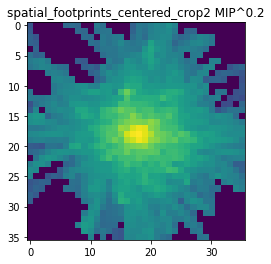

In [101]:
# # LOAD stat.npy file 2
# #___________________


# # dir_load = '\\\\research.files.med.harvard.edu\\Neurobio\\MICROSCOPE\\Rich\\data\\res2p\\scanimage data\\round 4 experiments\\mouse 6.28\\20200815\\suite2p\\plane0\\'
# fileName_load = 'stat.npy'

# PATH_absolute = pathlib.Path('.').absolute()
# # PATH_load_dir_statFile = f'{PATH_absolute}/label data/mouse 6_28 _ day 20200903/'
# PATH_load_dir_statFile = f'{PATH_absolute}/label data/mouse6_28 _ day20200815/'
# # PATH_load_dir_statFile = '/media/rich/Home_Linux_partition/GoogleDrive_ocaml_cache/Research/Sabatini Lab Stuff - working/Code/PYTHON/ROI_Classifiers/test data_mouse6_28 _ 20200815/'
# print(f'PATH:   {PATH_load_dir_statFile}{fileName_load}')
# print('')

# stat2 = np.load(f'{PATH_load_dir_statFile}{fileName_load}', allow_pickle=True)
# print('stat file loaded')
# print('')

# num_ROI2 = stat2.shape[0]
# print(f'Number of ROIs: {num_ROI2}')

# height = 512
# width = 1024
# spatial_footprints_centered2 = np.zeros((num_ROI2, 241,241))
# for i in range(num_ROI2):
#     spatial_footprints_centered2[i , stat2[i]['ypix'] - np.int16(stat2[i]['med'][0]) + 120, stat2[i]['xpix'] - np.int16(stat2[i]['med'][1]) + 120] = stat2[i]['lam'] # this is formatted for coding ease (dim1: y pix) (dim2: x pix) (dim3: ROI#)
# spatial_footprints_centered_crop2 = spatial_footprints_centered2[:, 102:138 , 102:138]

# # %matplotlib inline
# plt.figure()
# plt.imshow(np.max(spatial_footprints_centered_crop2 , axis=0) ** 0.2);
# plt.title('spatial_footprints_centered_crop MIP^0.2');

# # images = spatial_footprints_centered_crop


spatial_footprints_centered_crop2 = load_npy(base_dir='/media/rich/bigSSD/downloads_tmp/labels_ROI_Classifier',
                                             subpath='mouse6_28 _ day20200815',
                                             lbl='2'
                                            )
images2 = spatial_footprints_centered_crop2


PATH:   /media/rich/bigSSD/downloads_tmp/labels_ROI_Classifier/mouseUnknownAi148__20210325/stat.npy

stat file loaded

Number of ROIs: 4893


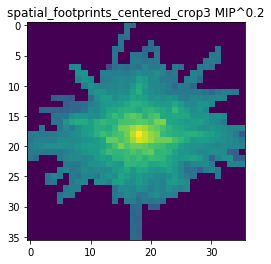

In [102]:
spatial_footprints_centered_crop3 = load_npy(base_dir='/media/rich/bigSSD/downloads_tmp/labels_ROI_Classifier',
                                             subpath='mouseUnknownAi148__20210325',
                                             lbl='3')
images3 = spatial_footprints_centered_crop3


PATH:   /media/rich/bigSSD/downloads_tmp/labels_ROI_Classifier/mouse2_6__20210409/stat.npy

stat file loaded

Number of ROIs: 4898


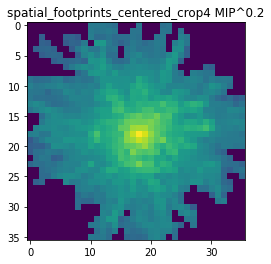

In [103]:
spatial_footprints_centered_crop4 = load_npy(base_dir='/media/rich/bigSSD/downloads_tmp/labels_ROI_Classifier',
                                             subpath='mouse2_6__20210409',
                                             lbl='4')
images4 = spatial_footprints_centered_crop4


stat file loaded

Number of ROIs: 4868
stat file loaded

Number of ROIs: 4847
stat file loaded

Number of ROIs: 4893
stat file loaded

Number of ROIs: 4898


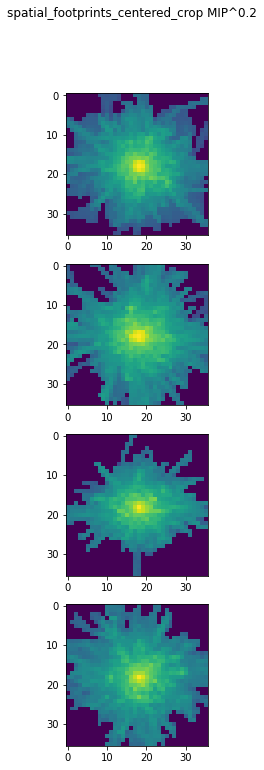

In [357]:
from pathlib import Path

path_list = list([
    Path(r'/media/rich/bigSSD/downloads_tmp/labels_ROI_Classifier/mouse 6_28 _ day 20200903'),
    Path(r'/media/rich/bigSSD/downloads_tmp/labels_ROI_Classifier/mouse6_28 _ day20200815'),
    Path(r'/media/rich/bigSSD/downloads_tmp/labels_ROI_Classifier/mouseUnknownAi148__20210325'),
    Path(r'/media/rich/bigSSD/downloads_tmp/labels_ROI_Classifier/mouse2_6__20210409'),
])

# stat_fileName = Path('stat.npy')
# preCrop_length = 241 # must be odd
# crop_length = 36 # must be even
# plot_pref = True

def load_stat_and_make_spatialFootprints(path_list, stat_fileName='stat.npy', preCrop_length=241, crop_length=36, plot_pref=True):
    preCrop_center = int((preCrop_length-1)/2)
    spatial_footprints_centered_crop = list(np.zeros(len(path_list)))
    for ii in range(len(path_list)):
        stat = np.load(path_list[ii] / Path(stat_fileName), allow_pickle=True)
        print('stat file loaded')
        print('')

        num_ROI = stat.shape[0]
        print(f'Number of ROIs: {num_ROI}')

        spatial_footprints_centered = np.zeros((num_ROI, preCrop_length,preCrop_length))
        for i in range(num_ROI):
            spatial_footprints_centered[i , stat[i]['ypix'] - np.int16(stat[i]['med'][0]) + preCrop_center, stat[i]['xpix'] - np.int16(stat[i]['med'][1]) + preCrop_center] = stat[i]['lam'] # this is formatted for coding ease (dim1: y pix) (dim2: x pix) (dim3: ROI#)
    #     spatial_footprints_centered_crop = spatial_footprints_centered[:, 102:138 , 102:138]
        spatial_footprints_centered_crop[ii] = spatial_footprints_centered[:, 
                                                                       int(preCrop_center-(crop_length/2)):int(preCrop_center+(crop_length/2)),
                                                                       int(preCrop_center-(crop_length/2)):int(preCrop_center+(crop_length/2))]
    if plot_pref:
        fig, axs = plt.subplots(len(path_list), figsize=(5,3*len(path_list)))
        for ii in range(len(axs)):
            axs[ii].imshow(np.max(spatial_footprints_centered_crop[ii] , axis=0) ** 0.2);
        fig.suptitle(f'spatial_footprints_centered_crop MIP^0.2');

    return spatial_footprints_centered_crop

images = load_stat_and_make_spatialFootprints(path_list, stat_fileName='stat.npy', preCrop_length=241, crop_length=36, plot_pref=True)

labels file loaded

Number of ROIs: 4868
number of labels and images match
labels file loaded

Number of ROIs: 4847
number of labels and images match
labels file loaded

Number of ROIs: 4893
number of labels and images match
labels file loaded

Number of ROIs: 4898
number of labels and images match


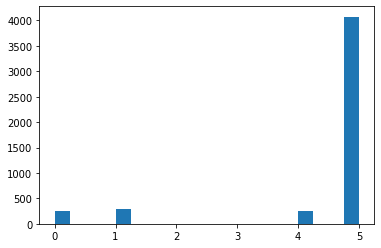

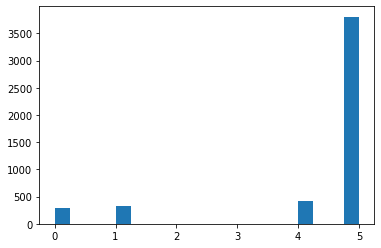

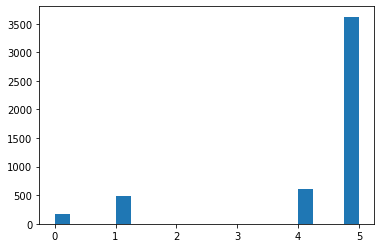

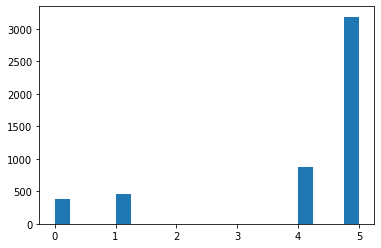

In [388]:
path_list = path_list

label_fileName = 'label'
plot_pref = True
fileName_is_prefix = True

def load_labels(path_list, label_fileName='label', fileName_is_prefix=True, plot_pref=True):
    labels = list(np.zeros(len(path_list)))
    for ii in range(len(path_list)):
        if fileName_is_prefix:
            labels[ii] = np.load(list((path_list[ii].glob(f'{label_fileName}*')))[-1], allow_pickle=True)
        else:
            labels[ii] = np.load(path_list[ii]/label_fileName, allow_pickle=True)

        print('labels file loaded')
        print('')

        num_ROI = labels[ii].shape[0]
        print(f'Number of ROIs: {num_ROI}')

        plt.figure()
        # plt.hist(labels[ii],20);
        plt.hist(labels[ii],20);


        #check in number of labels matches number of images
        if images[ii].shape[0] == len(labels[ii]):
            print('number of labels and images match')
        else:
            print('WARNING: number of labels and images DO NOT match')

    return labels

labels = load_labels(path_list, label_fileName = 'label', fileName_is_prefix=True, plot_pref=True)

In [411]:
# split_datasets

test_fraction = 0.15
# rand_seed = 465

def cv_split_datasets(images, labels, test_fraction=0.15, rand_seed=None):
    n_datasets = len(images)

    train_x, val_x, train_y, val_y, train_idx, val_idx = list(np.zeros(n_datasets)), list(np.zeros(n_datasets)), list(np.zeros(n_datasets)), list(np.zeros(n_datasets)), list(np.zeros(n_datasets)), list(np.zeros(n_datasets))
    for ii in range(n_datasets):
        train_x[ii], val_x[ii], train_y[ii], val_y[ii], train_idx[ii], val_idx[ii] = train_test_split(images[ii],
                                                                                                      labels[ii],
                                                                                                      np.arange(len(labels[ii])),
                                                                                                      test_size=test_fraction,
                                                                                                      random_state=rand_seed)
    train_x_all = np.concatenate(train_x)
    val_x_all = np.concatenate(val_x)
    train_y_all = np.concatenate(train_y)
    val_y_all = np.concatenate(val_y)

    return train_x, val_x, train_y, val_y, train_idx, val_idx,    train_x_all, val_x_all, train_y_all, val_y_all

train_x, val_x, train_y, val_y, train_idx, val_idx,    train_x_all, val_x_all, train_y_all, val_y_all = cv_split_datasets(images, labels, test_fraction=0.15, rand_seed=None)

In [105]:
def gaussian_kernel_2D(center = (5, 5), image_size = (11, 11), sig = 1):
    """
    Generate a 2D or 1D gaussian kernel
    
    Args:
        center (tuple):  the mean position (X, Y) - where high value expected. 0-indexed. Make second value 0 to make 1D gaussian
        image_size (tuple): The total image size (width, height). Make second value 0 to make 1D gaussian
        sig (scalar): The sigma value of the gaussian
    
    Return:
        kernel (np.ndarray): 2D or 1D array of the gaussian kernel
    """
    x_axis = np.linspace(0, image_size[0]-1, image_size[0]) - center[0]
    y_axis = np.linspace(0, image_size[1]-1, image_size[1]) - center[1]
    xx, yy = np.meshgrid(x_axis, y_axis)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))

    return kernel

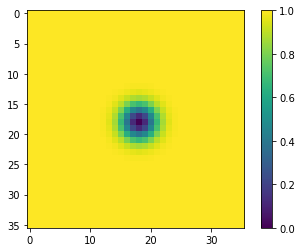

In [301]:
window = 1 - gaussian_kernel_2D(center=(18,18), image_size=(36,36), sig=2)

plt.figure()
plt.imshow(window)
plt.colorbar()

<ipython-input-413-9b852069c322>:26: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(im_fft_win)))


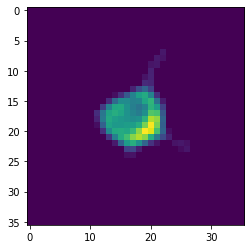

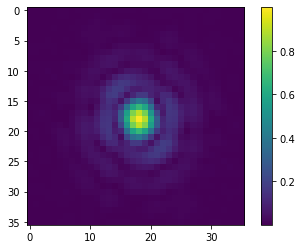

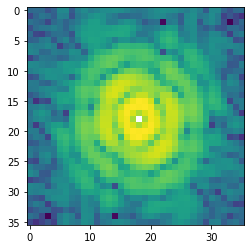

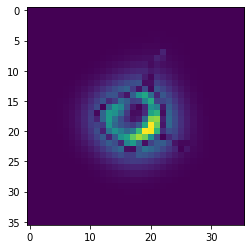

In [413]:
# this doesn't work so well because of frequency filter ripple effects
from scipy.fft import fft2, ifft2, fftshift

%matplotlib inline



im_toUse = images4[8]

def freq_filt_2D(input_image, window_image, plot_pref=True):
    im_fft = fftshift(fft2(input_image))

    im_fft_win = window_image * im_fft

    im_fft_win_ifft = ifft2(im_fft_win)

    if plot_pref:
        plt.figure()
        plt.imshow(input_image)

        plt.figure()
        plt.imshow(np.abs(im_fft))
        plt.colorbar()

        plt.figure()
        plt.imshow(np.log(np.abs(im_fft_win)))

        plt.figure()
        plt.imshow(abs(im_fft_win_ifft))
        
im_filt = freq_filt_2D(im_toUse, window, plot_pref=True)

In [108]:
import numpy as np
import matplotlib.pyplot as plt
def gaussian(x, mu, sig , plot_pref=False):
    '''
    A gaussian function (normalized similarly to scipy's function)
    RH 2021
    
    Args:
        x (np.ndarray): 1-D array of the x-axis of the kernel
        mu (float): center position on x-axis
        sig (float): standard deviation (sigma) of gaussian
        plot_pref (boolean): True/False or 1/0. Whether you'd like the kernel plotted
    Returns:
        gaus (np.ndarray): gaussian function (normalized) of x
        params_gaus (dict): dictionary containing the input params
    '''

    gaus = 1/(np.sqrt(2*np.pi)*sig)*np.exp(-np.power((x-mu)/sig, 2)/2)

    if plot_pref:
        plt.figure()
        plt.plot(x , gaus)
        plt.xlabel('x')
        plt.title(f'$\mu$={mu}, $\sigma$={sig}')
    
    params_gaus = {
        "x": x,
        "mu": mu,
        "sig": sig,
    }

    return gaus , params_gaus

In [109]:
def make_distance_image(center_idx, vid_height, vid_width):
    """
    creates a matrix of cartesian coordinate distances from the center

    Args:
        center_idx (list): chosen center index
        vid_height (int): height of the video in pixels
        vid_width (int): width of the video in pixels

    Returns:
        distance_image (np.ndarray): array of distances to the center index

    """

    x, y = np.meshgrid(range(vid_width), range(vid_height))  # note dim 1:X and dim 2:Y
    return np.sqrt((y - int(center_idx[1])) ** 2 + (x - int(center_idx[0])) ** 2)

In [192]:
def scale_between(x, lower=0, upper=1, axes=0, lower_percentile=None, upper_percentile=None, crop_pref=True):
    '''
    Scales the first (or more) dimension of an array to be between 
    lower and upper bounds.
    RH 2021

    Args:
        x (ndarray):
            Any dimensional array. First dimension is scaled
        lower (scalar):
            lower bound for scaling
        upper (scalar):
            upper bound for scaling
        axes (tuple):
            UNTESTED for values other than 0.
            It should work for tuples defining axes, so long
            as the axes are sequential starting from 0
            (eg. (0,1,2,3) ).
        lower_percentile (scalar):
            Ranges between 0-100. Defines what percentile of
            the data to set as the lower bound
        upper_percentile (scalar):
            Ranges between 0-100. Defines what percentile of
            the data to set as the upper bound
        crop_pref (bool):
            If true then data is cropped to be between lower
            and upper. Only meaningful if lower_percentile or
            upper_percentile is not None.

    Returns:
        x_out (ndarray):
            Scaled array
    '''

    if lower_percentile is not None:
        lowest_val = np.percentile(x, lower_percentile, axis=axes)
    else:
        lowest_val = np.min(x, axis=axes)
    if upper_percentile is not None:
        highest_val = np.percentile(x, upper_percentile, axis=axes)
    else:
        highest_val = np.max(x, axis=axes)

    x_out = ((x - lowest_val) * (upper - lower) / (highest_val - lowest_val) ) + lower

    if crop_pref:
        x_out[x_out < lower] = lower
        x_out[x_out > upper] = upper

    return x_out

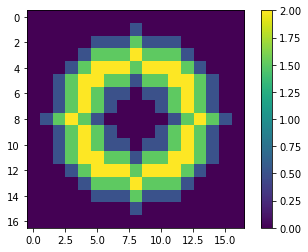

In [270]:
# useful for making manual filters (don't push through conv layers. side load into the later FC layers)
def make_cosine_taurus(offset, width):
    l = (offset + width)*2 + 1
    c_idx = (l-1)/2
    cosine = np.cos(np.linspace((-np.pi) , (np.pi), width)) + 1
    cosine = np.concatenate((np.zeros(offset), cosine))
    dist_im = make_distance_image([c_idx , c_idx], l, l)
    taurus = cosine[np.searchsorted(np.arange(len(cosine)), dist_im, side='left')-1]
    return taurus
kernel_taurus = make_cosine_taurus(1,7)
plt.figure()
plt.imshow(kernel_taurus)
plt.colorbar()

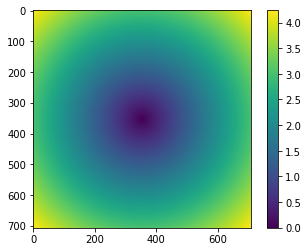

In [439]:
kernel_length = 7 # must be odd
kernel_size = 0.3

kernel_upscaleFactor = 101

kernel_centerIdx = (kernel_length*kernel_upscaleFactor-1)/2 

%matplotlib inline

dist_im = make_distance_image([kernel_centerIdx , kernel_centerIdx], kernel_length*kernel_upscaleFactor, kernel_length*kernel_upscaleFactor)
dist_im = (dist_im/(kernel_length*kernel_upscaleFactor))*2 * ((kernel_length-1)/2)
plt.figure();
plt.imshow(dist_im);
plt.colorbar();

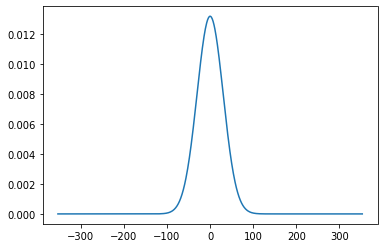

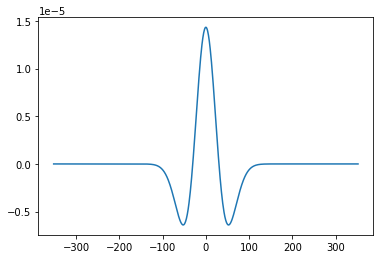

In [436]:
def make_mexicanHat_kernel(kernel_length=31, mexHat_width=2.5, plot_pref=True):
    if kernel_length%2 != 1:
        raise NameError('kernel_length should be odd')
    kernel_centerIdx = (kernel_length-1)/2 
    gaus , params_gaus = gaussian(np.arange(-kernel_centerIdx, kernel_centerIdx+1), 0, mexHat_width)
    mexHat = -np.diff(gaus,2)
    x_mexHat = params_gaus['x'][1:-1]

    if plot_pref:
        plt.figure()
        plt.plot(params_gaus['x'], gaus)
        plt.figure()
        plt.plot(x_mexHat, mexHat)

    return mexHat, x_mexHat

# gaus , params_gaus = gaussian(np.arange(-kernel_centerIdx, kernel_centerIdx+1), 0, kernel_size*kernel_upscaleFactor)

mexHat, x_mexHat = make_mexicanHat_kernel(kernel_length=kernel_length*kernel_upscaleFactor,
                                          mexHat_width=kernel_size*kernel_upscaleFactor,
                                          plot_pref=True)

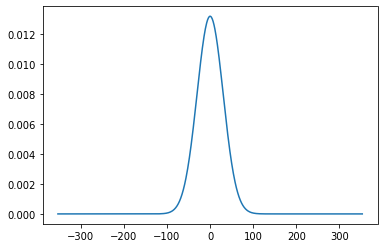

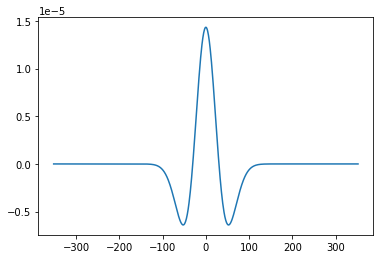

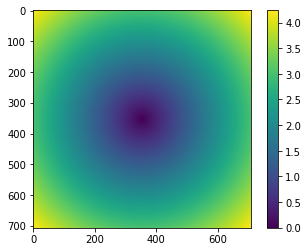

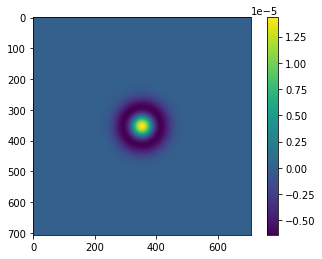

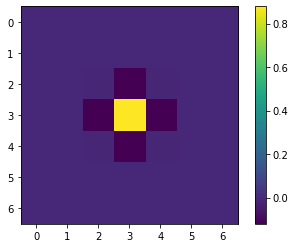

In [445]:
kernel_length = 7 # must be odd
kernel_size = 0.3

kernel_upscaleFactor = 101
plot_pref = True

def make_mexHat_2D(kernel_length=7, kernel_size=0.3, kernel_upscaleFactor=101, plot_pref=True):

    if kernel_length%2 != 1:
        raise NameError('kernel_length should be odd')
    if kernel_upscaleFactor%2 != 1:
        raise NameError('kernel_upscaleFactor should be odd')    

    kernel_centerIdx = (kernel_length*kernel_upscaleFactor-1)/2 

    mexHat, x_mexHat = make_mexicanHat_kernel(kernel_length=kernel_length*kernel_upscaleFactor,
                                              mexHat_width=kernel_size*kernel_upscaleFactor,
                                              plot_pref=plot_pref)
    dist_im = make_distance_image([kernel_centerIdx , kernel_centerIdx], kernel_length*kernel_upscaleFactor, kernel_length*kernel_upscaleFactor)
    dist_im = (dist_im/(kernel_length*kernel_upscaleFactor))*2 * ((kernel_length-1)/2)

    if plot_pref:
        plt.figure();
        plt.imshow(dist_im);
        plt.colorbar();

    mexHat_2D_large = mexHat[np.searchsorted(x_mexHat/kernel_upscaleFactor, dist_im, side='left')-1]

    if plot_pref:
        plt.figure()
        plt.imshow(mexHat_2D_large)
        plt.colorbar()

    mexHat_2D = skimage.transform.resize(mexHat_2D_large, (kernel_length,kernel_length), 
                                         order=None, 
                                         anti_aliasing=False)
    mexHat_2D = scale_between(mexHat_2D, lower=0, upper=1, axes=(0,1))
    mexHat_2D = mexHat_2D - np.mean(mexHat_2D)

    if plot_pref:
        plt.figure()
        plt.imshow(mexHat_2D)
        plt.colorbar()
make_mexHat_2D()

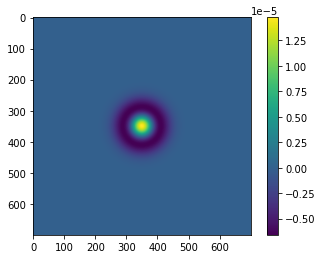

In [298]:
mexHat_2D_large = mexHat[np.searchsorted(x_mexHat/kernel_upscaleFactor, dist_im, side='left')-1]

plt.figure()
plt.imshow(mexHat_2D_large)
plt.colorbar()

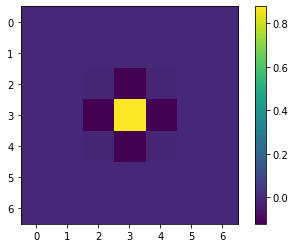

In [299]:
import skimage.transform

mexHat_2D = skimage.transform.resize(mexHat_2D_large, (kernel_length,kernel_length), 
                                     order=None, 
                                     anti_aliasing=False)
mexHat_2D = scale_between(mexHat_2D, lower=0, upper=1, axes=(0,1))
mexHat_2D = mexHat_2D - np.mean(mexHat_2D)

plt.figure()
plt.imshow(mexHat_2D)
plt.colorbar()

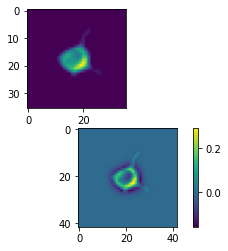

In [300]:
import scipy.signal
test = scipy.signal.convolve2d(im_toUse, mexHat_2D, mode='full', boundary='fill', fillvalue=0) * (kernel_length**2)

fig, axs = plt.subplots(2)
axs[0].imshow(im_toUse)

ax = axs[1].imshow(test)
plt.colorbar(ax)

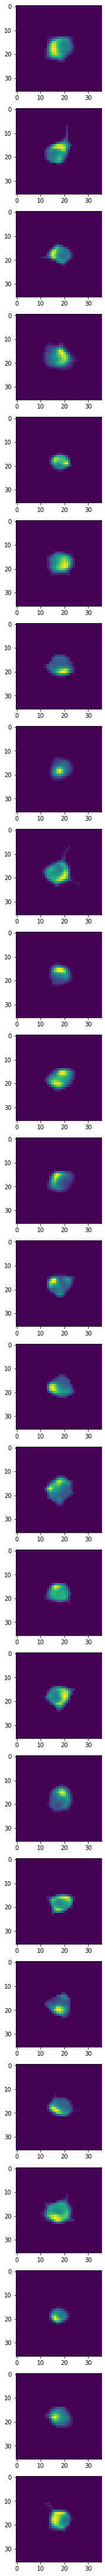

In [91]:
%matplotlib inline
fig, axs = plt.subplots(25, figsize=(10,80))

for ii in range(len(axs)):
    axs[ii].imshow(images4[ii])

In [11]:
images = np.concatenate((spatial_footprints_centered_crop , spatial_footprints_centered_crop2) , axis = 0)
print(images.shape)

(9715, 36, 36)


In [12]:
def load_labels(base_dir='../../label_data',
                 subpath='mouse 6_28 _ day 20200903',
                 fileName_load='labels_posthoc_filledIn_allCells.npy',
                 num_labels=6):
    
    PATH_absolute = pathlib.Path('.').absolute()
    
    PATH_load_dir_statFile = f'{PATH_absolute}/{base_dir}/{subpath}/'
    
    print(f'PATH:   {PATH_load_dir_statFile}{fileName_load}')
    print('')

    labels1 = np.load(f'{PATH_load_dir_statFile}{fileName_load}')
    print('labels file loaded')
    print('')


    plt.figure()
    # plt.hist(labels,20);
    plt.hist(labels1,20);


    #check in number of labels matches number of images
    if images.shape[0] == len(labels1):
        print('number of labels and images match')
    else:
        print('WARNING: number of labels and images DO NOT match')
    
    return labels1

PATH:   /Users/josh/Documents/Harvard/GCaMP_ROI_classifier/ROIClassifier-tmp/../../label_data/mouse 6_28 _ day 20200903/labels_posthoc_filledIn_allCells.npy

labels file loaded



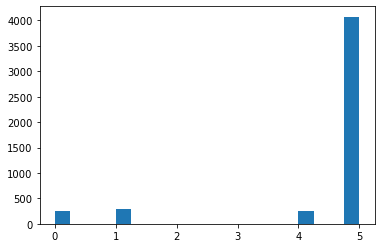

In [13]:
# # LOAD labels file 1
# #___________________

# num_labels = 6

# PATH_absolute = pathlib.Path('.').absolute()
# PATH_load_dir_statFile = f'{PATH_absolute}/label data/mouse 6_28 _ day 20200903/'
# fileName_load = 'labels_posthoc_filledIn_allCells.npy'
# print(f'PATH:   {PATH_load_dir_statFile}{fileName_load}')
# print('')

# labels1 = np.load(f'{PATH_load_dir_statFile}{fileName_load}')
# print('labels file loaded')
# print('')


# plt.figure()
# # plt.hist(labels,20);
# plt.hist(labels1,20);


# #check in number of labels matches number of images
# if images.shape[0] == len(labels1):
#     print('number of labels and images match')
# else:
#     print('WARNING: number of labels and images DO NOT match')


labels1 = load_labels(base_dir='../../label_data',
            subpath='mouse 6_28 _ day 20200903',
            fileName_load='labels_posthoc_filledIn_allCells.npy',
            num_labels=6)

In [14]:
images.shape, labels1.shape

((9715, 36, 36), (4868,))

PATH:   /Users/josh/Documents/Harvard/GCaMP_ROI_classifier/ROIClassifier-tmp/../../label_data/mouse6_28 _ day20200815/labels_posthoc_all.npy

labels file loaded



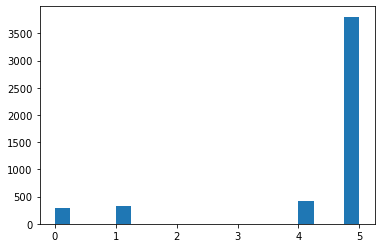

In [15]:
# # LOAD labels file 2
# #___________________

# num_labels = 6

# PATH_absolute = pathlib.Path('.').absolute()
# PATH_load_dir_statFile = f'{PATH_absolute}/label data/mouse6_28 _ day20200815/'
# fileName_load = 'labels_posthoc_all.npy'
# print(f'PATH:   {PATH_load_dir_statFile}{fileName_load}')
# print('')

# labels2 = np.load(f'{PATH_load_dir_statFile}{fileName_load}')
# print('labels file loaded')
# print('')


# plt.figure()
# # plt.hist(labels,20);
# plt.hist(labels2,20);


# #check in number of labels matches number of images
# if images.shape[0] == len(labels2):
#     print('number of labels and images match')
# else:
#     print('WARNING: number of labels and images DO NOT match')
    
    
    
labels2 = load_labels(base_dir='../../label_data',
            subpath='mouse6_28 _ day20200815',
            fileName_load='labels_posthoc_all.npy',
            num_labels=6)

PATH:   /Users/josh/Documents/Harvard/GCaMP_ROI_classifier/ROIClassifier-tmp/../../label_data/mouseUnknownAi148__20210325/labels_posthoc_mouseUnknownAi148__20210325.npy

labels file loaded



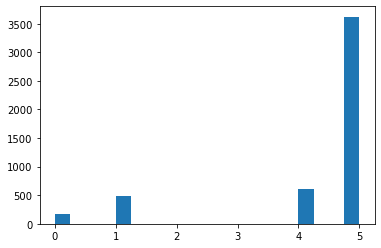

In [16]:
labels3 = load_labels(base_dir='../../label_data',
            subpath='mouseUnknownAi148__20210325',
            fileName_load='labels_posthoc_mouseUnknownAi148__20210325.npy',
            num_labels=6)

PATH:   /Users/josh/Documents/Harvard/GCaMP_ROI_classifier/ROIClassifier-tmp/../../label_data/mouse2_6__20210409/labels_posthoc_mouse2_6__20210409.npy

labels file loaded



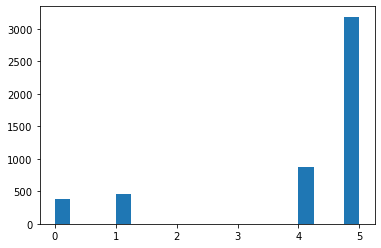

In [17]:
labels4 = load_labels(base_dir='../../label_data',
            subpath='mouse2_6__20210409',
            fileName_load='labels_posthoc_mouse2_6__20210409.npy',
            num_labels=6)

In [18]:
labels = np.concatenate((labels1 , labels2))
print(labels.shape)

(9715,)


In [19]:
np.save('../../trash/temp_images.npy', images)

In [20]:
np.save('../../trash/temp_labels.npy', labels)

In [21]:
seed = 465
np.random.seed(seed)

# create validation set
train_x, val_x, train_y, val_y = train_test_split(images[:], labels[:], test_size = 0.15)

# train_x, train_y = images, labels
tea_x, tea_y = images3, labels3
teb_x, teb_y = images4, labels4
(train_x.shape, train_y.shape), (val_x.shape, val_y.shape), (tea_x.shape, tea_y.shape), (teb_x.shape, teb_y.shape)

(((8257, 36, 36), (8257,)),
 ((1458, 36, 36), (1458,)),
 ((4893, 36, 36), (4893,)),
 ((4898, 36, 36), (4898,)))

In [22]:
# importing the libraries
import pandas as pd

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout, Sigmoid, SELU, GELU, ELU, PReLU, Softplus, Softmax2d, AvgPool2d, Tanh
from torch.optim import Adam, SGD

counts = np.histogram(labels,np.arange(7))

weightings_groups_forSampling = np.zeros(6)
for ii in np.array([0,1,4,5]):
    weightings_groups_forSampling[ii] = np.max(counts[0]) / counts[0][ii]

plt.figure()
plt.bar(range(6), weightings_groups_forSampling)

# %matplotlib qt
weightings_forSampling = np.zeros(len(labels)) + 1e-9
for ii in range(len(weightings_forSampling)):
    weightings_forSampling[ii] = weightings_groups_forSampling[labels[ii]]

weightings_forSampling = weightings_forSampling / np.sum(weightings_forSampling)
plt.figure()
plt.plot(weightings_forSampling)
plt.plot(scipy.signal.savgol_filter(weightings_forSampling,11,2))

# light data augmentation
duplicates = 10

# duplication to equalize the probability of encountering each case

images_dup = train_x[0][None,:,:]
labels_aug = np.array([val_y[0]])

for ii in range(6):
    images_dup = np.concatenate( ( images_dup , np.tile(images[labels==ii] ,( np.int16(weightings_groups_forSampling[ii]) , 1 , 1 ) )), axis=0)
    labels_aug = np.concatenate( ( labels_aug , np.ones( np.int16(weightings_groups_forSampling[ii]) * np.sum(labels==ii) ) * ii) )
images_dup = np.tile(images_dup , (duplicates,1,1))
# images_dup = images_dup / np.tile(np.max(images_dup , axis=(1,2)) , (images_dup.shape[1], images_dup.shape[2], 1)).transpose(2,0,1) # noramlized all the images' max values to 1
labels_aug = np.tile(labels_aug , duplicates)

test = np.ones(images_dup.shape[0]) * np.nan
images_dup_int8 = np.int8(np.zeros_like(images_dup))
images_dup_uint8 = np.uint8(np.zeros_like(images_dup))
for ii , val in enumerate(images_dup):
    images_dup_int8[ii] = np.int8(np.round((( images_dup[ii] / np.max(images_dup[ii], axis=(0,1)) ) -0.5) * 122))
    images_dup_uint8[ii] = np.uint8(np.round((( images_dup[ii] / np.max(images_dup[ii], axis=(0,1)) )) * 122))
    test[ii] = np.mean(images_dup_uint8[ii], axis=(0,1))

In [23]:
duplicates = dup_num

images_dup = np.tile(train_x , (duplicates , 1 , 1))
labels_aug = np.tile(train_y , (duplicates))

print(images_dup.shape)
print(labels_aug.shape)

numToGetTo = np.sum(labels_aug==0)
print(numToGetTo)
for ii in np.array([1,4,5]):
#     idxToDelete = np.cumsum(labels_aug==ii) <= (np.sum(labels_aug==ii) - numToGetTo)
    if ii==5:
        numToGetTo = np.sum(labels_aug==0)/2
    else:
        numToGetTo = np.sum(labels_aug==0)

    idxToDelete = (np.cumsum(labels_aug==ii) * (labels_aug==ii)) > numToGetTo
    images_dup = images_dup[idxToDelete==0,:,:]
    labels_aug = labels_aug[idxToDelete==0]


print(np.sum(labels_aug==0))
print(np.sum(labels_aug==1))
print(np.sum(labels_aug==4))
print(np.sum(labels_aug==5))
print(images_dup.shape)
print(labels_aug.shape)

(8257, 36, 36)
(8257,)
442
442
442
442
221
(1548, 36, 36)
(1548,)


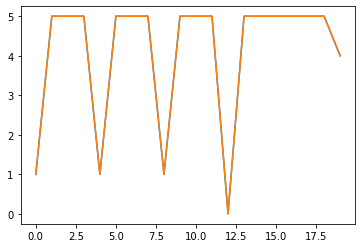

In [24]:
# %matplotlib inline
# %matplotlib inline

plt.figure()
plt.plot(labels_aug[:20])
plt.plot(train_y[:20])
# plt.plot(scipy.signal.savgol_filter(labels_aug , 11 , 3))

# plt.figure()
# plt.imshow(images_dup[5]);
# print(images_dup.dtype)

In [25]:
aug_seq = iaa.Sequential([], random_order=True) # apply augmenters in random order

np.save('images_aug.npy' , images_aug)

images_aug = np.load('images_aug.npy')

(1548, 36, 36)
float64
float64


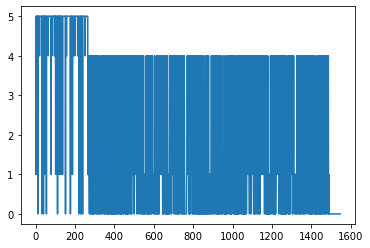

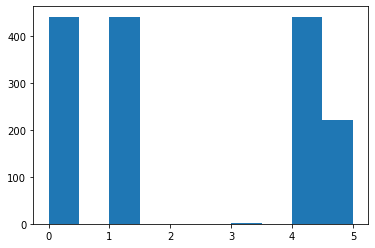

In [26]:
# images_aug = aug_seq(images=images_dup_uint8)
images_aug = aug_seq(images=images_dup)
# images_aug = images_dup
# images_aug = images_aug

# images_aug = images_aug / np.tile(np.max(images_aug , axis=(1,2)) , (images_aug.shape[1], images_aug.shape[2], 1)).transpose(2,0,1) # noramlized all the images' max values to 1

print(images_aug.shape)

# plt.figure()
# plt.imshow(images_dup_uint8[6])
plt.figure()
plt.plot(labels_aug)
plt.figure()
plt.hist(labels_aug);

print(images_dup.dtype)
print(images_aug.dtype)

# print(images_aug.shape)
# print(labels_aug.shape)

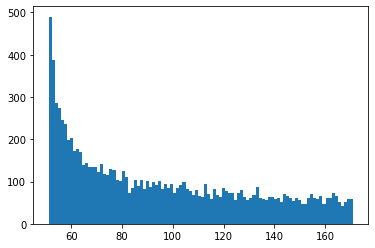

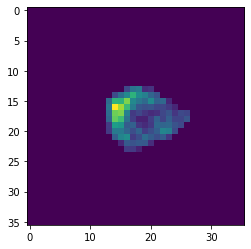

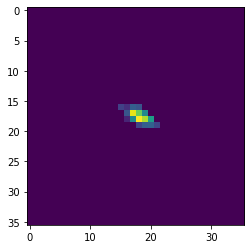

In [27]:
# noiseGain_inverse = np.random.rand(1)**2 * 100 + 10
# plt.figure()
# test = (100 * ( np.random.rand(10000) + 0.1 )**2)+12
# plt.hist(test[test < 1000],100);
noiseGain_inverse = lambda x: (100 * ( np.random.rand(x) + 0.1 )**2)+50
plt.figure()
plt.hist(noiseGain_inverse(10000),100)

images_toUse = images_aug

images_aug_noisy = np.zeros_like(images_toUse)
for ii in range(images_toUse.shape[0]):
    if np.random.rand(1) < 0.8:
        noise = noiseGain_inverse(1)
#         images_aug_noisy[ii] = np.random.poisson(images_toUse[ii] / np.max(images_toUse[ii]) ) * noise / noise * np.max(images_toUse[ii])   # noisy image
        images_aug_noisy[ii] = np.random.poisson(images_toUse[ii] / np.max(images_toUse[ii]) * noise) / noise * np.max(images_toUse[ii])   # noisy image
    else:
        images_aug_noisy[ii] = images_toUse[ii]
plt.figure()
plt.imshow(images_aug_noisy[0])
plt.figure()
plt.imshow(images_aug_noisy[1])

np.save('images_aug.npy' , images_aug)

<IPython.core.display.Javascript object>


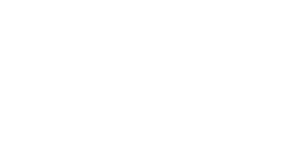

0.9900706281377281


In [28]:
%matplotlib notebook
plt.figure()
plt.imshow(images_aug_noisy[8])
print(np.sum(images_aug_noisy[8]))

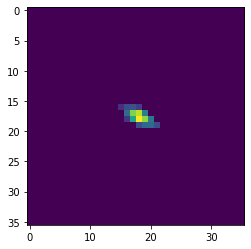

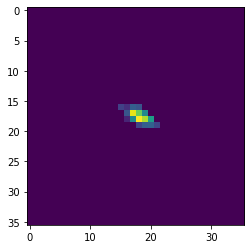

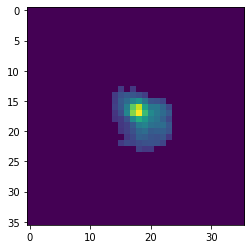

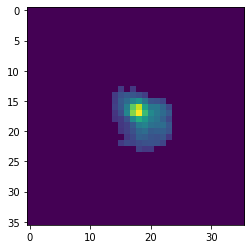

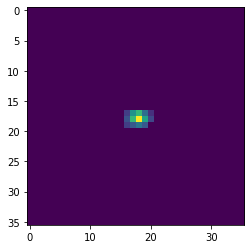

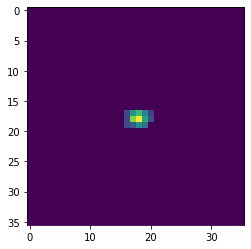

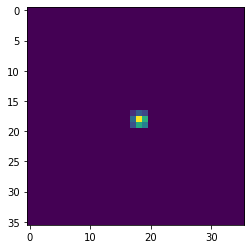

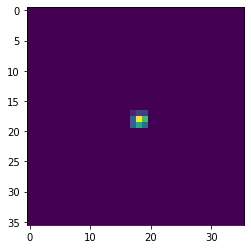

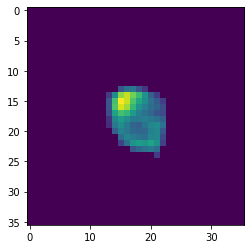

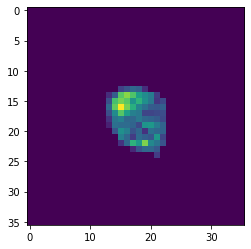

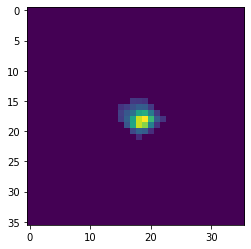

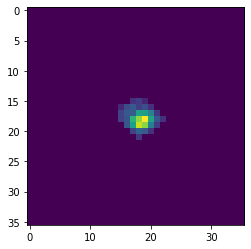

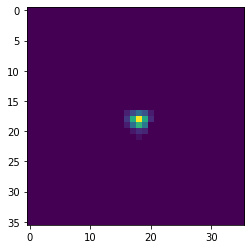

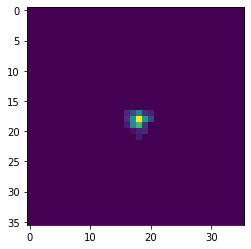

In [29]:
%matplotlib inline
plt.figure()
plt.imshow(images_dup[1])
plt.figure()
plt.imshow(images_aug_noisy[1])
plt.figure()
plt.imshow(images_dup[5])
plt.figure()
plt.imshow(images_aug_noisy[5])
plt.figure()
plt.imshow(images_dup[6])
plt.figure()
plt.imshow(images_aug_noisy[6])
plt.figure()
plt.imshow(images_dup[7])
plt.figure()
plt.imshow(images_aug_noisy[7])
plt.figure()
plt.imshow(images_dup[8])
plt.figure()
plt.imshow(images_aug_noisy[8])
plt.figure()
plt.imshow(images_dup[9])
plt.figure()
plt.imshow(images_aug_noisy[9])
plt.figure()
plt.imshow(images_dup[10])
plt.figure()
plt.imshow(images_aug_noisy[10])

0.3054571542954863
0.0
5
0
(1548, 1, 36, 36)
(1548,)


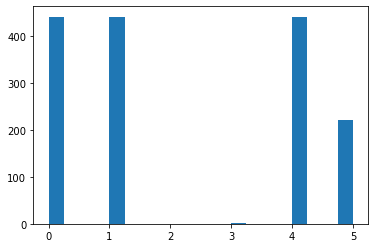

In [30]:
images_toUse = copy.deepcopy(images_aug)

# normalize
for ii in range(images_toUse.shape[0]):
    images_toUse[ii] = images_toUse[ii] / np.sum(images_toUse[ii]) 

# %matplotlib inline
# data_y = copy.deepcopy(labels[:643])
# data_y = np.int16(data_y - 1)

# data_y = train_y
# data_y = copy.deepcopy(labels_posthoc_filledIn)
data_y = copy.deepcopy(labels_aug)
# data_y = labels
# data_y = copy.deepcopy(train_y)

# data_x = images[:643,:,:]
# data_x = images
# data_x = train_x
# data_x = images_aug
# data_x = images_aug_noisy
data_x = images_toUse
# data_x = images_dup
# data_x = data_x / np.max(np.max(data_x, axis=2) , axis=1)[:,None,None]


# sample_submission = pd.read_csv('sample_submission_I5njJSF.csv')

# train.head()

print(np.max(data_x))
print(np.min(data_x))
print(np.max(data_y))
print(np.min(data_y))
# plt.figure()
# plt.imshow(np.squeeze(data_y[3,:,:,:]))
# data_y
plt.figure()
plt.hist(data_y,20);

# converting training images into torch format
data_x = data_x[:,None,:,:]
# train_x  = torch.from_numpy(train_x)
#data_x = torch.as_tensor(data_x)#.type('torch.cuda.FloatTensor')

# converting the target into torch format
data_y = data_y.astype(int);
# train_y = torch.from_numpy(train_y)
#data_y = torch.as_tensor(data_y)#.type('torch.cuda.LongTensor')

# shape of training data
print(data_x.shape)
print(data_y.shape)

In [31]:
data_x.shape

(1548, 1, 36, 36)

In [32]:
heldOut_x = val_x[: , None , : , :] #torch.as_tensor(val_x[: , None , : , :])#.type('torch.cuda.FloatTensor')
heldOut_y = val_y.astype(int) #torch.as_tensor(val_y.astype(int))#.type('torch.cuda.LongTensor')

hO_tea_x = tea_x[: , None , : , :]
hO_tea_y = tea_y.astype(int)
hO_teb_x = teb_x[: , None , : , :]
hO_teb_y = teb_y.astype(int)
print(heldOut_x.shape)
print(heldOut_y.shape)

(1458, 1, 36, 36)
(1458,)


In [33]:
from sklearn.metrics import accuracy_score
import tensorflow as tf
keras = tf.keras
layers = keras.layers
regularizers = keras.regularizers

# Reorganize "x" Data to Have Channels as Last Dimension
reorg_x = lambda x: np.transpose(x,(0,2,3,1))

In [34]:
# Define LeNet Architecture (with L1 / L2 regularization in place of DropOut)

l1_reg = 1e-5
l2_reg = 1e-4

rich_model_l12 = keras.Sequential([
    layers.Conv2D(16, 5, (1,1),
                        kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)
                       ),
    layers.Activation(keras.activations.relu),
    layers.Conv2D(16, 5, (1,1),
                        kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)
                       ),
    layers.MaxPool2D((2,2), 2),
    layers.Activation(keras.activations.relu),
    layers.Conv2D(32, 5, (1,1), padding='same',
                        kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)
                       ),
    layers.MaxPool2D((2,2), 2),
    layers.Activation(keras.activations.relu),
    layers.Conv2D(64, 5, (1,1),
                        kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)
                       ),
    layers.MaxPool2D((2,2), 2),
    layers.Activation(keras.activations.relu),
    
    layers.Flatten(),
    
    layers.Dense(256),
    layers.Activation(keras.activations.relu),
    layers.Dense(6)
    
])

dropout_prob = 0.4

rich_model = keras.Sequential([
    layers.Conv2D(16, 5, (1,1)),
    layers.Activation(keras.activations.relu),
    layers.Conv2D(16, 5, (1,1)),
    layers.MaxPool2D((2,2), 2),
    layers.Activation(keras.activations.relu),
    
    layers.Dropout(dropout_prob*1),
    
    
    
    
    
    
    layers.Conv2D(32, 5, (1,1), padding='same'),
    layers.MaxPool2D((2,2), 2),
    layers.Activation(keras.activations.relu),
    
    layers.Dropout(dropout_prob*1),
    
    
    
    
    
    
    
    layers.Conv2D(64, 5, (1,1)),
    layers.MaxPool2D((2,2), 2),
    layers.Activation(keras.activations.relu),
    
    layers.Dropout(dropout_prob*1),   
    
    
    
    
    
    
    
    layers.Flatten(),
    
    layers.Dense(256),
    layers.Activation(keras.activations.relu),
    
    layers.Dropout(dropout_prob*1),
    
    layers.Dense(6)
    
])



In [35]:
# Define an identity block for ResNet
# Adapted From: https://github.com/keras-team/keras-applications/blob/master/keras_applications/resnet50.py
def make_ResNet_conv_block(inp,
                           kernel_size=5,
                           filt=(16,32,64),
                           strides=(2,2),
                           l1_reg=1e-5,
                           l2_reg=1e-4):
    
    filt1, filt2, filt3 = filt[0], filt[1], filt[2]

    prv = layers.Conv2D(filt1, (1, 1), strides,
                        kernel_initializer='he_normal',
                        kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)
                       )(inp)
    prv = layers.BatchNormalization(axis=3)(prv)
    prv = layers.Activation('relu')(prv)

    prv = layers.Conv2D(filt2, (kernel_size, kernel_size), (1,1),
                        kernel_initializer='he_normal', padding='same',
                        kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)
                       )(prv)
    prv = layers.BatchNormalization(axis=3)(prv)
    prv = layers.Activation('relu')(prv)

    prv = layers.Conv2D(filt3, (1, 1), (1,1),
                        kernel_initializer='he_normal',
                        kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)
                       )(prv)
    prv = layers.BatchNormalization(axis=3)(prv)

    shrt = layers.Conv2D(filt3, (1,1), strides,
                        kernel_initializer='he_normal',
                        kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)
                       )(inp)
    shrt = layers.BatchNormalization(axis=3)(shrt)

    prv = layers.Lambda(lambda x: x[0] + x[1])([prv, shrt])

    return prv
    

In [36]:
# Define an identity block for ResNet
# Adapted From: https://github.com/keras-team/keras-applications/blob/master/keras_applications/resnet50.py
def make_ResNet_id_block(inp,
                           kernel_size=5,
                           filt=(16,32,64),
                           l1_reg=1e-5,
                           l2_reg=1e-4):
    
    filt1, filt2, filt3 = filt[0], filt[1], filt[2]

    prv = layers.Conv2D(filt1, (1, 1), (1,1),
                        kernel_initializer='he_normal',
                        kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)
                       )(inp)
    prv = layers.BatchNormalization(axis=3)(prv)
    prv = layers.Activation('relu')(prv)

    prv = layers.Conv2D(filt2, (kernel_size, kernel_size), (1,1),
                        kernel_initializer='he_normal', padding='same',
                        kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)
                       )(prv)
    prv = layers.BatchNormalization(axis=3)(prv)
    prv = layers.Activation('relu')(prv)

    prv = layers.Conv2D(filt3, (1, 1), (1,1),
                        kernel_initializer='he_normal',
                        kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)
                       )(prv)
    prv = layers.BatchNormalization(axis=3)(prv)

    prv = layers.Lambda(lambda x: x[0] + x[1])([prv, inp])

    return prv
    

In [37]:
tf.random.set_seed(seed)

# Create ResNet Architecture

inp = layers.Input(shape=reorg_x(data_x).shape[1:])

prv = inp

# prv = layers.ZeroPadding2D(padding=(3, 3))(prv)
# prv = layers.Conv2D(64, (7, 7),
#                   strides=(2, 2),
#                   padding='valid',
#                   kernel_initializer='he_normal')(prv)
# prv = layers.BatchNormalization(axis=3)(prv)
# prv = layers.Activation('relu')(prv)
# prv = layers.ZeroPadding2D(padding=(1, 1))(prv)
# prv = layers.MaxPooling2D((3, 3), strides=(2, 2))(prv)


prv = make_ResNet_conv_block(prv, 5, [64, 64, 128], strides=(1,1))
prv = make_ResNet_id_block(prv, 5, [64, 64, 128])
prv = make_ResNet_id_block(prv, 5, [64, 64, 128])


# prv = make_ResNet_conv_block(prv, 5, [16, 32, 64], strides=(1,1))
# prv = make_ResNet_id_block(prv, 5, [16, 32, 64],
#                            l1_reg=1e-8,
#                            l2_reg=1e-7)
# prv = make_ResNet_id_block(prv, 5, [16, 32, 64],
#                            l1_reg=1e-8,
#                            l2_reg=1e-7)

# prv = make_ResNet_conv_block(prv, 3, [128, 128, 512])
# prv = make_ResNet_id_block(prv, 3, [128, 128, 512])
# prv = make_ResNet_id_block(prv, 3, [128, 128, 512])
# prv = make_ResNet_id_block(prv, 3, [128, 128, 512])

# prv = make_ResNet_conv_block(prv, 3, [256, 256, 1024])
# prv = make_ResNet_id_block(prv, 3, [256, 256, 1024])
# prv = make_ResNet_id_block(prv, 3, [256, 256, 1024])
# prv = make_ResNet_id_block(prv, 3, [256, 256, 1024])
# prv = make_ResNet_id_block(prv, 3, [256, 256, 1024])
# prv = make_ResNet_id_block(prv, 3, [256, 256, 1024])

# prv = make_ResNet_conv_block(prv, 3, [512, 512, 2048])
# prv = make_ResNet_id_block(prv, 3, [512, 512, 2048])
# prv = make_ResNet_id_block(prv, 3, [512, 512, 2048])

prv = layers.Flatten()(prv)
prv = layers.Dense(256)(prv)
prv = layers.Activation(keras.activations.relu)(prv)

# prv = layers.GlobalMaxPooling2D()(prv)

# out = layers.Dense(6, activation='softmax')(prv)
out = layers.Dense(6)(prv)

# out = prv

jz_model = keras.Model(inputs=[inp], outputs=[out])

In [38]:
prv.shape

TensorShape([None, 256])

In [39]:
# Select Model Architecture to Train

# model = rich_model
model = jz_model

In [40]:
# Data Augmentation Generator
# Adapted from: https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=180,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=45,
    width_shift_range=(-0.05,0.05),
    height_shift_range=(-0.05,0.05),
#     brightness_range=(-0.1, 0.1),
    zoom_range=(0.6, 1.7),
#     preprocessing_function=lambda x: x / np.sum(x) 
)

In [ ]:
# Compile Model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )


# Save Training Curve Data
history = model.fit(datagen.flow(reorg_x(data_x), data_y, batch_size=32),
                    validation_data=(reorg_x(heldOut_x), heldOut_y),
                    callbacks=keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=20,
                                                            restore_best_weights=True),

                    epochs=200)

res_name = 'resnet_r2f'

f'../../{res_name}'

Epoch 1/200
49/49 [==============================] - 35s 707ms/step - loss: 1.7930 - accuracy: 0.4309 - val_loss: 2.6922 - val_accuracy: 0.0693
Epoch 2/200
49/49 [==============================] - 35s 705ms/step - loss: 1.4140 - accuracy: 0.4897 - val_loss: 3.7156 - val_accuracy: 0.0617
Epoch 3/200
49/49 [==============================] - 35s 721ms/step - loss: 1.3163 - accuracy: 0.5200 - val_loss: 4.2058 - val_accuracy: 0.0617
Epoch 4/200
49/49 [==============================] - 36s 732ms/step - loss: 1.2490 - accuracy: 0.5614 - val_loss: 4.7123 - val_accuracy: 0.0617
Epoch 5/200
49/49 [==============================] - 37s 757ms/step - loss: 1.2781 - accuracy: 0.5362 - val_loss: 4.4861 - val_accuracy: 0.0617
Epoch 6/200
49/49 [==============================] - 39s 790ms/step - loss: 1.2054 - accuracy: 0.5756 - val_loss: 4.5273 - val_accuracy: 0.0624
Epoch 7/200
49/49 [==============================] - 36s 740ms/step - loss: 1.2143 - accuracy: 0.5930 - val_loss: 4.9991 - val_accuracy:

In [ ]:
model.save(f'../../{res_name}')

In [ ]:
acc = keras.metrics.Accuracy()
acc.update_state(np.argmax(model.predict(reorg_x(heldOut_x)),-1),heldOut_y)
print('Val Accuracy CV:',acc.result().numpy())

acc_tea = keras.metrics.Accuracy()
acc_tea.update_state(np.argmax(model.predict(reorg_x(hO_tea_x)),-1),hO_tea_y)
print('Val Accuracy Test:',acc_tea.result().numpy())

acc_teb = keras.metrics.Accuracy()
acc_teb.update_state(np.argmax(model.predict(reorg_x(hO_teb_x)),-1),hO_teb_y)
print('Val Accuracy Test:',acc_teb.result().numpy())

In [ ]:
from_logits = True

scc = keras.losses.SparseCategoricalCrossentropy(from_logits=from_logits)
sccpred = scc(heldOut_y, model.predict(reorg_x(heldOut_x))).numpy()
# sccpred = scc(labels3.astype(int), model.predict(reorg_x(images3[: , None , : , :]))).numpy()
print('Val Loss CV:',sccpred)

scc_tea = keras.losses.SparseCategoricalCrossentropy(from_logits=from_logits)
sccpred_tea = scc_tea(hO_tea_y, model.predict(reorg_x(hO_tea_x))).numpy()
print('Val Loss Test:',sccpred_tea)

scc_teb = keras.losses.SparseCategoricalCrossentropy(from_logits=from_logits)
sccpred_teb = scc_teb(hO_teb_y, model.predict(reorg_x(hO_teb_x))).numpy()
print('Val Loss Test:', sccpred_teb)

In [ ]:
# Generate Training Curves

train_losses = history.history['loss']
val_losses = history.history['val_loss']
accuracy_running = history.history['val_accuracy']

%matplotlib inline
# plotting the training and validation loss
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss') 
plt.plot(accuracy_running, label='Accuracy')
plt.legend()
plt.show()


In [ ]:
# Generate Confusion Matrix

%matplotlib inline

# chk_model = keras.models.load_model('resnet_1')
chk_model = model

output = chk_model.predict(reorg_x(heldOut_x))

prob = output
predictions = np.argmax(prob, axis=1)

# val_y_bool = np.zeros((len(val_y) , np.max(val_y.numpy())-1))
heldOut_y_bool = np.zeros((len(heldOut_y) , 6))
predictions_bool = np.zeros((len(heldOut_y) , 6))
for ii in range(6):
    heldOut_y_bool[:,ii] = (heldOut_y == ii)
    predictions_bool[:,ii] = (predictions==ii)
# plt.figure()
# plt.imshow(predictions_bool)

from numpy import matlib
matrix_probability = (predictions_bool.T @ heldOut_y_bool) / matlib.repmat(np.sum(heldOut_y_bool,axis=0) , 6,1)
plt.ion()
plt.figure()
plt.imshow(matrix_probability);
plt.show()

# Print Numerical Confusion Matrix
display(pd.DataFrame(matrix_probability))

In [ ]:
# Generate Confusion Matrix

%matplotlib inline

# chk_model = keras.models.load_model('resnet_1')
chk_model = model

output = chk_model.predict(reorg_x(hO_tea_x))

prob = output
predictions = np.argmax(prob, axis=1)

# val_y_bool = np.zeros((len(val_y) , np.max(val_y.numpy())-1))
heldOut_y_bool = np.zeros((len(hO_tea_y) , 6))
predictions_bool = np.zeros((len(hO_tea_y) , 6))
for ii in range(6):
    heldOut_y_bool[:,ii] = (hO_tea_y == ii)
    predictions_bool[:,ii] = (predictions==ii)
# plt.figure()
# plt.imshow(predictions_bool)



from numpy import matlib
matrix_probability = (predictions_bool.T @ heldOut_y_bool) / matlib.repmat(np.sum(heldOut_y_bool,axis=0) , 6,1)

# Print Numerical Confusion Matrix
display(pd.DataFrame(matrix_probability))

plt.ion()
plt.figure()
plt.imshow(matrix_probability);
plt.show()


In [ ]:
# Generate Confusion Matrix

%matplotlib inline

# chk_model = keras.models.load_model('resnet_1')
chk_model = model

output = chk_model.predict(reorg_x(hO_teb_x))

prob = output
predictions = np.argmax(prob, axis=1)

# val_y_bool = np.zeros((len(val_y) , np.max(val_y.numpy())-1))
heldOut_y_bool = np.zeros((len(hO_teb_y) , 6))
predictions_bool = np.zeros((len(hO_teb_y) , 6))
for ii in range(6):
    heldOut_y_bool[:,ii] = (hO_teb_y == ii)
    predictions_bool[:,ii] = (predictions==ii)
# plt.figure()
# plt.imshow(predictions_bool)

from numpy import matlib
matrix_probability = (predictions_bool.T @ heldOut_y_bool) / matlib.repmat(np.sum(heldOut_y_bool,axis=0) , 6,1)


# Print Numerical Confusion Matrix
display(pd.DataFrame(matrix_probability))

plt.ion()
plt.figure()
plt.imshow(matrix_probability);
plt.show()
